# Egenværdier og egenvektorer

Demo af Christian Mikkelstrup og Hans Henrik Hermansen

In [2]:
from sympy import *
init_printing()

I denne SymPy demo undersøger vi en matrix og hvordan vi med SymPy kan lave operationer på den i forbindelse med egenværdier og egenvektorer. Dette foregår først med "simuleret håndregning", og viser til sidst de direkte kommandoer. Afbildningsmatricen vi betragter er

\begin{equation}
_eF_e = \begin{bmatrix}6&3&12\\4&-5&4\\-4&-1&-10\end{bmatrix}
\end{equation}

for den lineære funktion $f:\mathbb{R}^3\to \mathbb{R}^3$ med hensyn til standard basis.

In [3]:
eFe = Matrix([[6,3,12],[4,-5,4],[-4,-1,-10]])

## At finde egenværdier

Vi opstiller først den karakteristiske matrix $K(\lambda)$, 

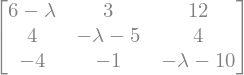

In [4]:
def K(l):
    return eFe - l * eye(3)

lamb = symbols('\lambda')
K(lamb)

Det karakteristiske polynomium fåes nu ved

In [5]:
karakpol = K(lamb).det()
karakpol

Man kan også benytte den indbyggede metode til at komme frem til dette resultat. Her skal det dog noteres at fortegnet er anderledes til forhold af den tidligere præsenterede metode. Dette er dog ikke et problem, da vi alligevel bare er interesserede i rødderne af det karakteristiske polynomium.

In [6]:
eFe.charpoly()

Hvormed egenværdierne kan findes ved

In [7]:
roots(karakpol)

I SymPy bliver vi nødt til at bede om rødderne i stedet for at løse ligningen til 0, da $\text{solve}$ ikke her fanger, at $-6$ har algebraisk multiplicitet 2! Dette kan også aflæses ved at bede om faktoriseringen,

In [8]:
factor(karakpol)

## At finde egenvektorene

For at finde egenvektorene tilhørende egenværdien $-6$, skal vi finde samtlige løsninger til $K(-6)\,x=\mathbf{0}$, 

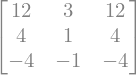

In [9]:
K(-6)

Løsningen kan findes ved brug af SymPy ved

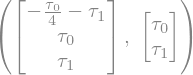

In [10]:
K(-6).gauss_jordan_solve(Matrix([0,0,0]))

Vi kan altså aflæse at egenrummet tilhørende egenværdien $-6$ er

\begin{equation}
E_{-6}=\text{span}\{\left(-\frac{1}{4},1,0\right),(-1,0,1)\}
\end{equation}

Her ser vi også at den geometriske, ligesom den algebraiske, multiplicitet er på to for $-6$.

Egenvektorene hørende til egenværdien 3 findes igen ved at løse $K(3)\,x=\mathbf{0}$, som her bare gøres ved at finde kernen til afbildningen tilsvarende til $K(3)$ (Dette havde også virket for $K(-6)$).

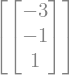

In [11]:
K(3).nullspace()

Altså fåes at $E_3=\text{span}\{(-3,-1,1)\}$, samt at den geometriske multiplicitet er lig med den algebraiske multiplicitet på en.

Hvis den sidste metode stadig ikke var hurtig nok for dig, så frygt ej, for i det følgende kommer de direkte kommandoer!

## Egenværdier og egenvektorer med stærke kommandoer

De følgende er *meget* brugbare!

In [12]:
eFe.eigenvals()

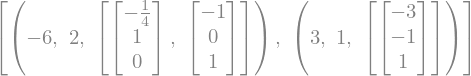

In [13]:
eFe.eigenvects()

Den sidste af kommandoerne giver altså både egenværdierne, deres tilhørende algebraiske multiplicitet, sammen med hvilke egenvektorer der udspænder egenrummet (og dermed også den geometriske multiplicitet)! 

Mega fedt!

*Det kan hænde, at egenvektorene vælges anderledes til forhold af den anden metode, men egenrummet de udspænder vil være det samme!*

## Egenbasis og diagonalmatrix

Da $n=3$ og vi i sidste opgave så at summen af de geometriske multipliciteter også er $3$, har vi af sætning 13.11, at der må findes en basis for vektorrummet bestående af egenvektorer for $f$. Vi kan vælge egenbasen

\begin{equation}
v=((-1,0,1),(-1/4,1,0),(-3,-1,1))
\end{equation}

Ved at bruge Hovedsætning 13.14, ser vi at dette giver afbildningsmatricen

\begin{equation}
_vF_v = \begin{bmatrix}-6&0&0\\0&-6&0\\0&0&3\end{bmatrix}
\end{equation}

Vi får et andet bud på et valg af egenvektorer, men også en mulig diagonalisering ved brug af den indbyggede funktion,

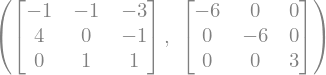

In [14]:
eFe.diagonalize()

Som dog kun virker, hvis vi har mulighed for at diagonalisere matricen,

In [15]:
eFe.is_diagonalizable()

True

## Diagonalisering ved basisskift

Vi kan også komme frem til diagonalmatricen ved at benytte basisskiftematricen, der skifter fra $v$-koordinater til standard basis koordinater, som fremkommer af de valgte egenvektorer,

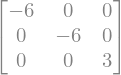

In [19]:
eMv = Matrix([[-1,-S(1)/4,-3],[0,1,-1],[1,0,1]])
vMe = eMv.inv()
vFv = vMe*eFe*eMv
vFv

Læg mærke til, at der her er indsat $\frac{1}{4}$ som sympy brøk (med $\text{S(1)}$). Hvis ikke dette gøres, ender der med at være numerisk meget små værdier i matricen, hvor der nu er $0$ (forsøg meget gerne at ændre og se hvad der sker). Dette kan altså nogle gange hjælpe, hvis I støder ind i dette problem.

Når man skriver ligningerne op, kan det også ses, at man, i stedet for at udregne den inverse, kan løse ligningen $_eM_v\,_vX_v=_eF_e\,_eM_v$ for $_vX_v$ ved

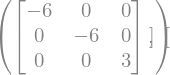

In [20]:
eMv.gauss_jordan_solve(eFe*eMv)